In [1]:
#load the data
import pandas as pd
df = pd.read_csv("C:\\Users\\PC-LENOVO\\Desktop\\ExcelR Assginments\\Random Forest\\Company_Data.csv")

In [2]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
df.shape  #(400,11)

(400, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


array([[<AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'CompPrice'}>,
        <AxesSubplot:title={'center':'Income'}>],
       [<AxesSubplot:title={'center':'Advertising'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Price'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Education'}>, <AxesSubplot:>]],
      dtype=object)

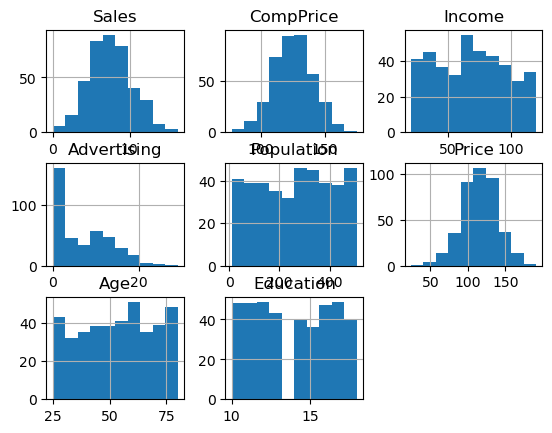

In [5]:
df.hist()

In [6]:
# Convert 'Sales' into a categorical variable (e.g., High Sales and Low Sales)
threshold = df['Sales'].quantile(0.75)  # You can adjust the threshold as needed    

In [7]:
df['Sales'] = df['Sales'].apply(lambda x: 'High Sales' if x >= threshold else 'Low Sales')
df['Sales']

0      High Sales
1      High Sales
2      High Sales
3       Low Sales
4       Low Sales
          ...    
395    High Sales
396     Low Sales
397     Low Sales
398     Low Sales
399    High Sales
Name: Sales, Length: 400, dtype: object

In [8]:
#EDA----->EXPLORATORY DATA ANALYSIS
#BOXPLOT AND OUTLIERS CALCULATION #
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\PC-LENOVO\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
data = df[df.columns[[1,2,3,4,5,7,8]]]

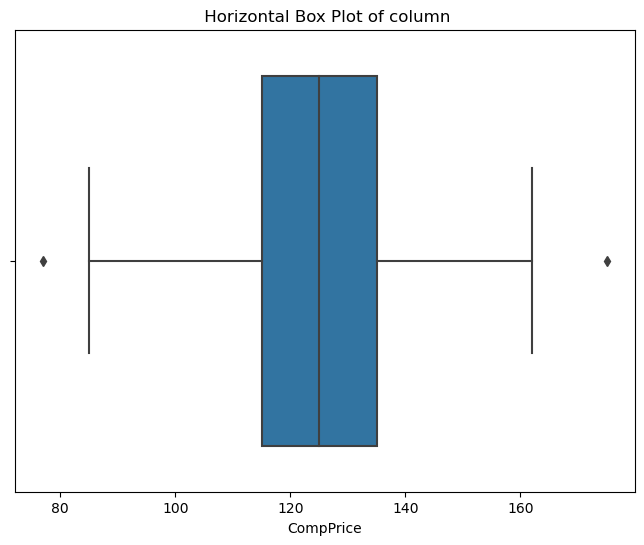

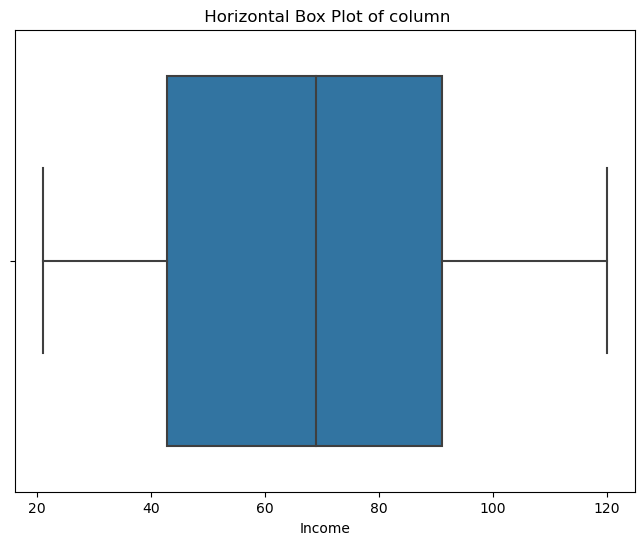

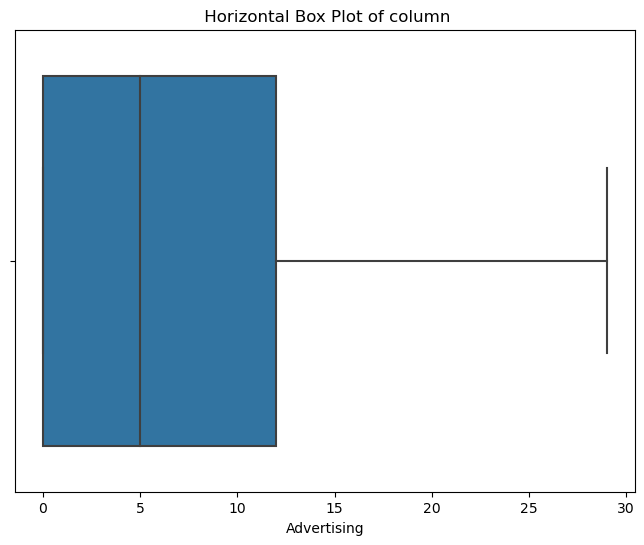

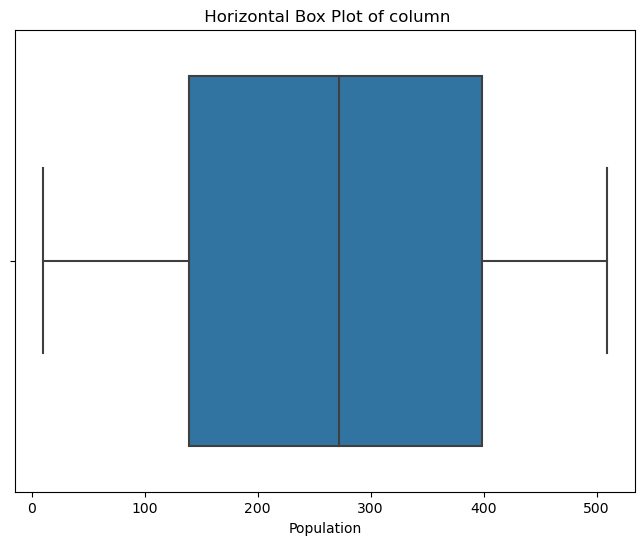

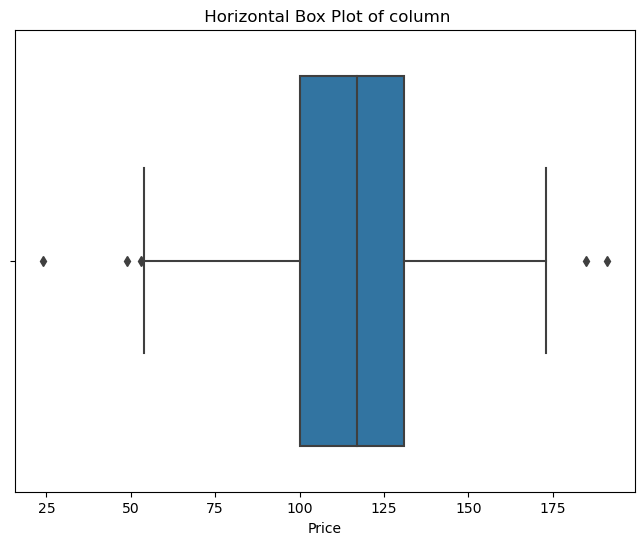

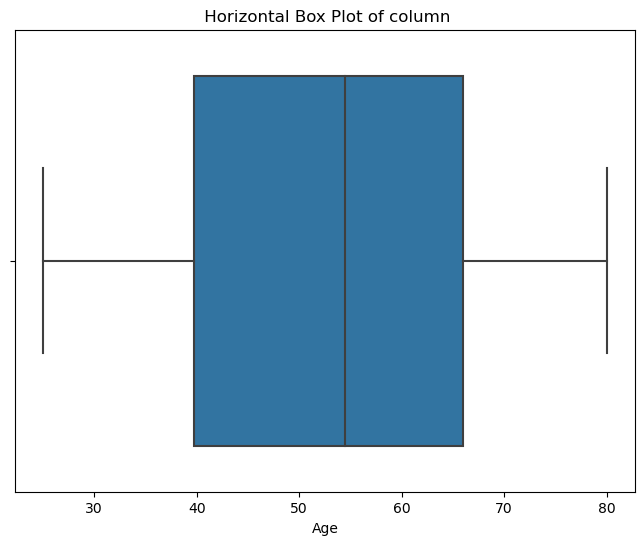

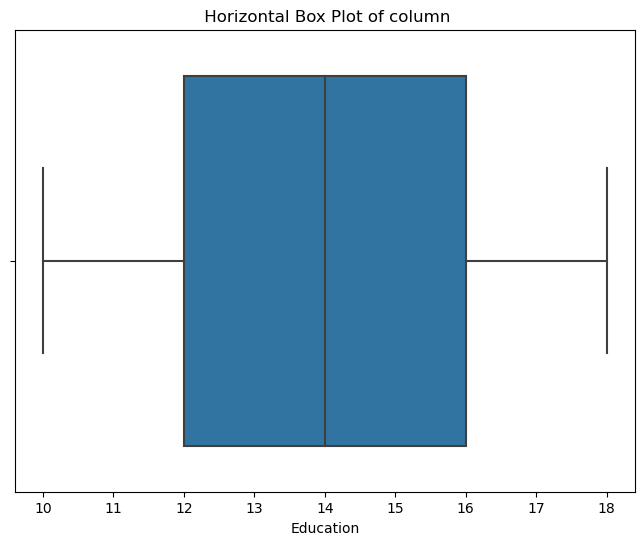

In [10]:
for column in data:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(x=df[column])
    plt.title(" Horizontal Box Plot of column")
    plt.show()
#We can see there are some outliers present 

In [11]:
#Removing the outliers
df1 = df[df.columns[[1,2,3,4,5,7,8]]]
df1

,CompPrice,Income,Advertising,Population,Price,Age,Education
0,138,73,11,276,120,42,17
1,111,48,16,260,83,65,10
2,113,35,10,269,80,59,12
3,117,100,4,466,97,55,14
4,141,64,3,340,128,38,13
...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14
396,139,23,3,37,120,55,11
397,162,26,12,368,159,40,18
398,100,79,7,284,95,50,12


In [12]:
from scipy import stats
# Define a threshold for Z-score (e.g., Z-score greater than 3 or less than -3 indicates an outlier)
z_threshold = 3

In [13]:
# Calculate the Z-scores for each column in the DataFrame
import numpy as np
z_scores = np.abs(stats.zscore(df1))

In [14]:
# Create a mask to identify rows with outliers
outlier_mask = (z_scores > z_threshold).any(axis=1)

In [15]:
# Remove rows with outliers from the DataFrame
df = df[~outlier_mask]
df.shape  #(397, 11)

(397, 11)

array([[<AxesSubplot:title={'center':'CompPrice'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Advertising'}>],
       [<AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Education'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

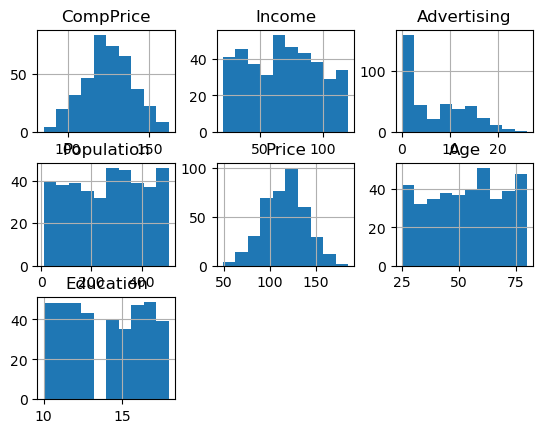

In [16]:
#HISTOGRAM BUILDING, SKEWNESS AND KURTOSIS CALCULATION #
df.hist()

In [17]:
df.skew()

C:\Users\PC-LENOVO\AppData\Local\Temp\ipykernel_3932\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


CompPrice     -0.053566
Income         0.045656
Advertising    0.589072
Population    -0.053280
Price         -0.081927
Age           -0.080826
Education      0.044988
dtype: float64

In [18]:
df.kurt()

C:\Users\PC-LENOVO\AppData\Local\Temp\ipykernel_3932\1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


CompPrice     -0.212801
Income        -1.098533
Advertising   -0.736543
Population    -1.194321
Price         -0.025287
Age           -1.139465
Education     -1.299541
dtype: float64

In [19]:
df.describe()

,CompPrice,Income,Advertising,Population,Price,Age,Education
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,124.914358,68.692695,6.594458,265.471033,115.710327,53.397985,13.891688
std,14.952204,28.086110,6.571616,147.003633,22.866967,16.206614,2.620019
min,85.000000,21.000000,0.000000,10.000000,49.000000,25.000000,10.000000
25%,115.000000,42.000000,0.000000,140.000000,100.000000,40.000000,12.000000
50%,125.000000,69.000000,5.000000,272.000000,117.000000,55.000000,14.000000
75%,135.000000,91.000000,12.000000,398.000000,131.000000,66.000000,16.000000
max,162.000000,120.000000,26.000000,509.000000,185.000000,80.000000,18.000000


In [20]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [21]:
df["ShelveLoc"] = LE.fit_transform(df["ShelveLoc"])

In [22]:
df["Urban"] = LE.fit_transform(df["Urban"])

In [23]:
df["US"] = LE.fit_transform(df["US"])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sales        397 non-null    object
 1   CompPrice    397 non-null    int64 
 2   Income       397 non-null    int64 
 3   Advertising  397 non-null    int64 
 4   Population   397 non-null    int64 
 5   Price        397 non-null    int64 
 6   ShelveLoc    397 non-null    int32 
 7   Age          397 non-null    int64 
 8   Education    397 non-null    int64 
 9   Urban        397 non-null    int32 
 10  US           397 non-null    int32 
dtypes: int32(3), int64(7), object(1)
memory usage: 32.6+ KB


In [25]:
# Split the data into features (X) and the target variable (y)
X = df.drop("Sales", axis=1)
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [26]:
Y = df["Sales"]
Y

0      High Sales
1      High Sales
2      High Sales
3       Low Sales
4       Low Sales
          ...    
395    High Sales
396     Low Sales
397     Low Sales
398     Low Sales
399    High Sales
Name: Sales, Length: 397, dtype: object

In [27]:
#Data Partition
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size = 0.75,random_state=123)

In [28]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [29]:
RF = RandomForestClassifier(n_estimators=100,
                            max_depth=7,
                            max_samples=0.6,
                            max_features=0.7,
                            random_state=123)  

In [30]:
RF.fit(X_train,Y_train)

RandomForestClassifier(max_depth=7, max_features=0.7, max_samples=0.6,
                       random_state=123)

In [31]:
Y_pred_train = RF.predict(X_train)

In [32]:
Y_pred_test = RF.predict(X_test)

In [33]:
#Metrices
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
ac1 = accuracy_score(Y_train,Y_pred_train)
print("Training Accuracy Score:",ac1.round(3))  #Training Accuracy Score: 0.987
ac2 = accuracy_score(Y_test,Y_pred_test)
print("Test Accuracy Score:",ac2.round(3))  #Test Accuracy Score: 0.8

Training Accuracy Score: 0.987
Test Accuracy Score: 0.8


In [34]:
# Confusion matrix and classification report
confusion = confusion_matrix(Y_test, Y_pred_test)
classification_rep = classification_report(Y_test, Y_pred_test)

In [35]:
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_rep)

Confusion Matrix:
 [[12 16]
 [ 4 68]]
Classification Report:
               precision    recall  f1-score   support

  High Sales       0.75      0.43      0.55        28
   Low Sales       0.81      0.94      0.87        72

    accuracy                           0.80       100
   macro avg       0.78      0.69      0.71       100
weighted avg       0.79      0.80      0.78       100



In [36]:
#Grid Search CV
# Import necessary libraries
from sklearn.model_selection import GridSearchCV

In [37]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 7, 9],
    'max_samples': [0.6, 0.7, 0.8],
    'max_features': [0.6, 0.7, 0.8]
    }

In [38]:
# Create a Random Forest classifier
RF = RandomForestClassifier(random_state=123)

In [39]:
# Create GridSearchCV object
grid_search = GridSearchCV(RF, param_grid, cv=5, scoring='accuracy')

In [40]:
# Fit the GridSearchCV object to the data
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             param_grid={'max_depth': [5, 7, 9],
                         'max_features': [0.6, 0.7, 0.8],
                         'max_samples': [0.6, 0.7, 0.8],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [41]:
# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)      #Best Parameters: {'max_depth': 7, 'max_features': 0.8, 'max_samples': 0.8, 'n_estimators': 100}
# Print the best accuracy score found by GridSearchCV
print("Best Accuracy Score:", grid_search.best_score_)   #Best Accuracy Score: 0.8836937463471652

Best Parameters: {'max_depth': 9, 'max_features': 0.8, 'max_samples': 0.6, 'n_estimators': 50}
Best Accuracy Score: 0.8787570621468926


In [42]:
# Get the best model from the GridSearchCV
best_RF = grid_search.best_estimator_

In [43]:
# Predict using the best model
Y_pred_train = best_RF.predict(X_train)
Y_pred_test = best_RF.predict(X_test)

In [44]:
# Metrics
ac1 = accuracy_score(Y_train, Y_pred_train)
print("Training Accuracy Score:", (ac1*100).round(3))  #Training Accuracy Score: 98.653
ac2 = accuracy_score(Y_test, Y_pred_test)
print("Test Accuracy Score:", (ac2*100).round(3))      #Test Accuracy Score: 79.0

Training Accuracy Score: 98.653
Test Accuracy Score: 79.0


In [45]:
# After hyperparameter tuning with GridSearchCV, the best parameters are:
# Max Depth: 9 ,Max Features: 0.8, Max Samples: 0.6 , Number of Estimators: 50
# The best accuracy score after hyperparameter tuning is 87.88%, indicating an improvement from the initial model.
# The training accuracy remains high at 98.65%
# The test accuracy is 79.0%, indicating good generalization

# Visualize Feature Importance
feature_importance = pd.Series(best_RF.feature_importances_, index=X.columns)
top_features = feature_importance.nlargest(10)

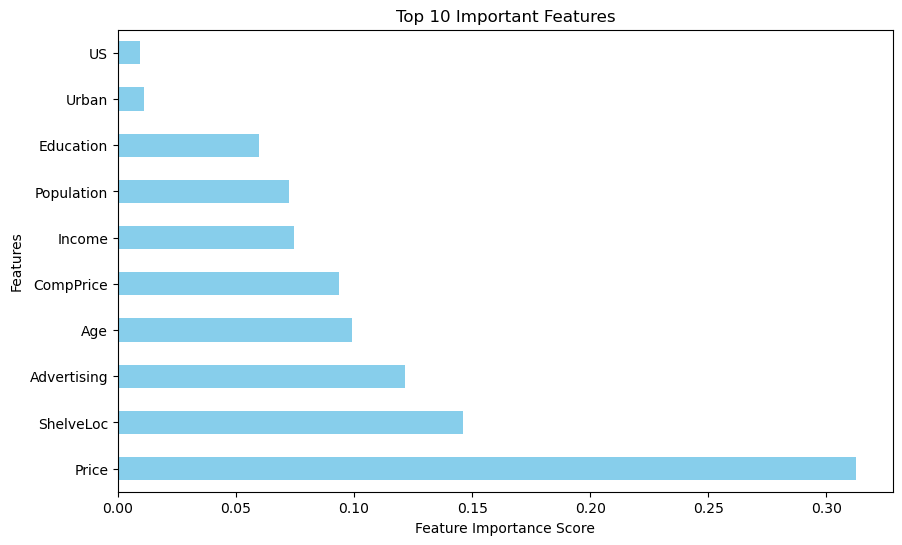

In [46]:
plt.figure(figsize=(10, 6))
top_features.plot(kind='barh', color='skyblue')
plt.title('Top 10 Important Features')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

In [ ]:
# when i applied Random Forest classifier , i got Training Accuracy Score: 98 ,Test Accuracy Score: 80%
# I gone through hyperparameter tuning process with GridSearchCV, the algorithm will systematically 
# evaluate different combinations of these hyperparameter values to find the combination
# I got Best Parameters: {'max_depth': 7, 'max_features': 0.8, 'max_samples': 0.7, 'n_estimators': 50}
# Training Accuracy Score: 98.63
# Test Accuracy Score: 79.59  it is good model to be considered
# This bar plot will provide a clear visual representation of the importance of each feature,
# with 'Price' being prominently displayed among the top features